# Applied Machine Learning: Foundations

Course Source: [LinkedIn Learning](https://www.linkedin.com/learning/applied-machine-learning-foundations)

## Pipeline: Clean Features & Fitting model

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Reading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

titanic = pd.read_csv('../../Datasets/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Clean continuous variables
1. Fill in missing values for `Age`
2. Combine `SibSp` & `Parch`
3. Drop irrelevant/repetitive variables (`SibSp`, `Parch`, `PassengerId`)

#### Filling missing value with average for `Age`

In [3]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Figure size 432x288 with 0 Axes>

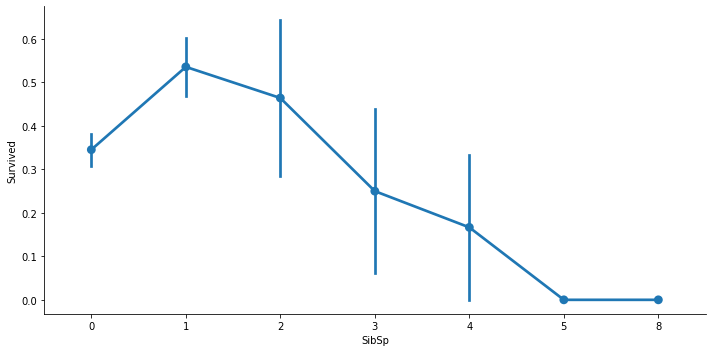

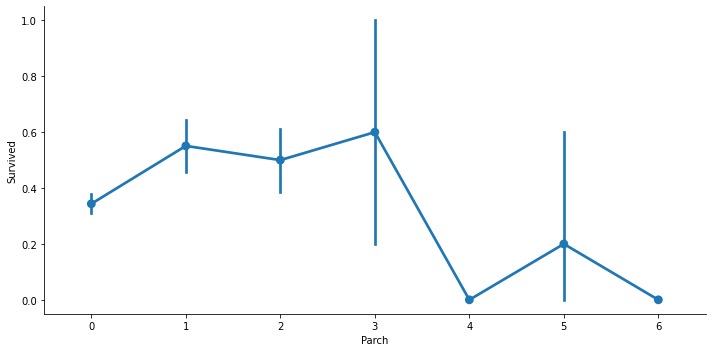

In [5]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2)

#### Combine `SibSp` & `Parch`

In [6]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

#### Drop unnecessary columns

In [7]:
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [8]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


### Clean categorical variables
1. Create an indicator variable in place of `Cabin`
2. Convert `Sex` to a numeric variable
3. Drop irrelevant/repetitive variables (`Cabin`, `Embarked`, `Name`, `Ticket`)

#### Creating indicator variable for `Cabin`

In [9]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [10]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


#### Coverting `Sex` to numeric variable

In [11]:
gender = {'male': 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


#### Droping unncessary variables

In [12]:
titanic.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


### Split data into train, validation, and test set

In [13]:
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [14]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


### Fit a basic model

#### Fit and evaluate a basic model using 5-fold Cross-Validation


In [15]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, x_train, y_train.values.ravel(), cv=5)

In [16]:
scores

array([0.81308411, 0.82242991, 0.8317757 , 0.78504673, 0.82075472])

### Hyperparameter tuning

In [17]:
def print_results(results):
    print('Best Params: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [18]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(x_train, y_train.values.ravel())

print_results(cv)

Best Params: {'max_depth': 10, 'n_estimators': 100}

0.79 (+/-0.097) for {'max_depth': 2, 'n_estimators': 5}
0.794 (+/-0.107) for {'max_depth': 2, 'n_estimators': 50}
0.802 (+/-0.099) for {'max_depth': 2, 'n_estimators': 100}
0.803 (+/-0.052) for {'max_depth': 10, 'n_estimators': 5}
0.813 (+/-0.042) for {'max_depth': 10, 'n_estimators': 50}
0.82 (+/-0.05) for {'max_depth': 10, 'n_estimators': 100}
0.79 (+/-0.064) for {'max_depth': 20, 'n_estimators': 5}
0.805 (+/-0.038) for {'max_depth': 20, 'n_estimators': 50}
0.817 (+/-0.022) for {'max_depth': 20, 'n_estimators': 100}
0.8 (+/-0.038) for {'max_depth': None, 'n_estimators': 5}
0.813 (+/-0.033) for {'max_depth': None, 'n_estimators': 50}
0.818 (+/-0.029) for {'max_depth': None, 'n_estimators': 100}


### Evaluate results on validation set

#### Fit best models on full training set

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

rf1 = RandomForestClassifier(n_estimators=100, max_depth=10)
rf1.fit(x_train, y_train.values.ravel())

rf2 = RandomForestClassifier(n_estimators=100, max_depth=20)
rf2.fit(x_train, y_train.values.ravel())

rf3 = RandomForestClassifier(n_estimators=100, max_depth=None)
rf3.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Evaluate models on validation set

In [20]:
for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(x_val)
    accuracy = round(accuracy_score(y_val, y_pred), 3)
    precision = round(precision_score(y_val, y_pred), 3)
    recall = round(recall_score(y_val, y_pred), 3)
    print('Max Depth: {} / # of EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

Max Depth: 10 / # of EST: 100 -- A: 0.821 / P: 0.855 / R: 0.697
Max Depth: 20 / # of EST: 100 -- A: 0.821 / P: 0.814 / R: 0.75
Max Depth: None / # of EST: 100 -- A: 0.821 / P: 0.824 / R: 0.737


#### Evaluate the best model on the test set

Taking the best model after validation set. Model 3 seems more acceptable than others.

In [21]:
y_pred = rf3.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
print('Max Depth: {} / # of EST: {} -- A: {} / P: {} / R: {}'.format(rf3.max_depth,
                                                                     rf3.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

Max Depth: None / # of EST: 100 -- A: 0.77 / P: 0.694 / R: 0.662
